In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:/Olympics Data Analysis/athlete_events.csv")
region_df = pd.read_csv("D:/Olympics Data Analysis/noc_regions.csv")

In [3]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season'] == 'Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [8]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [9]:
df.merge(region_df,on='NOC',how='left')   # LEFT JOIN - here basically we are merging by region basis & left indicates left join
df = df.merge(region_df,on='NOC',how='left') 

In [10]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [11]:
# To know how many countries have participated,
df['region'].unique()

# To know the count of countries we can use,
df['region'].unique().shape

(206,)

In [12]:
# Let's find if there are any duplicacies 
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
# Checking for duplicate rows
df.duplicated().sum()

1385

In [14]:
# Now lets drop these duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()  # We've dropped all the duplicate values

0

In [16]:
df['Medal'].value_counts()  # Now we'll find the medal count on the basis of region

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [17]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)    # I have separated the medals into different cols.
# This is new data frame

In [18]:
df.shape    # original data frame

(221167, 20)

In [19]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN,0,0,0


In [20]:
# GROUP BY - Now performing GROUP BY on NOC for the sum of all cols.
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
5,FRA,463.0,567.0,587.0
6,HUN,432.0,328.0,363.0
7,SWE,354.0,396.0,358.0
8,AUS,342.0,452.0,510.0
9,GDR,339.0,277.0,227.0


In [21]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [22]:
# Removing duplicacies on the basis of Team, NOC, Games, Year, City, Sport, Event
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [23]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [24]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze'] 

In [25]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


In [27]:
years = df['Year'].unique().tolist()

In [28]:
years.sort()

In [30]:
years.insert(0,'Overall')

In [31]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [45]:
country = np.unique(df['region'].dropna().values).tolist()

In [47]:
country.sort()

In [48]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [49]:
country.insert(0,'Overall')

In [51]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [52]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


In [80]:
def fetch_medal_tally(year, country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]        
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == country)] 
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze'] 
    
    print(x)

In [68]:
fetch_medal_tally(year='Overall',country='Overall')

            region    Gold  Silver  Bronze   total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]


In [70]:
fetch_medal_tally(year='2016',country='France')

   region  Gold  Silver  Bronze  total
0  France    10      18      14     42


In [71]:
fetch_medal_tally(year='Overall',country='France')

   region   Gold  Silver  Bronze  total
0  France  234.0   256.0   287.0  777.0


In [73]:
fetch_medal_tally(year='2012',country='Overall')

                          region  Gold  Silver  Bronze  total
0                            USA    46      28      29    103
1                          China    38      27      24     89
2                             UK    29      17      19     65
3                         Russia    24      26      32     82
4                    South Korea    13       8       7     28
..                           ...   ...     ...     ...    ...
197                        India     0       2       4      6
198  Individual Olympic Athletes     0       0       0      0
199                    Indonesia     0       1       1      2
200                         Iraq     0       0       0      0
201                     Zimbabwe     0       0       0      0

[202 rows x 5 columns]


In [79]:
fetch_medal_tally(year='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [60]:
medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,0,0,0
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,0,0,0
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,0,0,0
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,0,0,0
195568,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,0,0,0
198042,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,0,0,0
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0


### Overall Analysis
###### No.of editions
###### No.of cities
###### No.of events/sports
###### No.of athletes
###### participating nations

In [87]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [86]:
df['Year'].unique().shape[0] -1

28

In [89]:
df['City'].unique().shape[0]

23

In [90]:
# To see which all the cities that hosted
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [91]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [92]:
df['Event'].unique().shape

(651,)

In [93]:
# No.of atheletes participated 
df['Name'].unique().shape

(116122,)

In [94]:
# No.of regions participated 
df['region'].unique().shape

(206,)

In [95]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [101]:
# deleting or dropping all the duplicate rows based on condition where Year & region are same then they are dropped

nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')


In [105]:
nations_over_time.rename(columns={'index':'Edition','Year':'No of Countries'},inplace=True)

In [104]:
import plotly.express as px

In [108]:
fig = px.line(nations_over_time, x="Edition", y="No of Countries")
fig.show()

In [109]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')


,index,Year
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [120]:
x = df.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

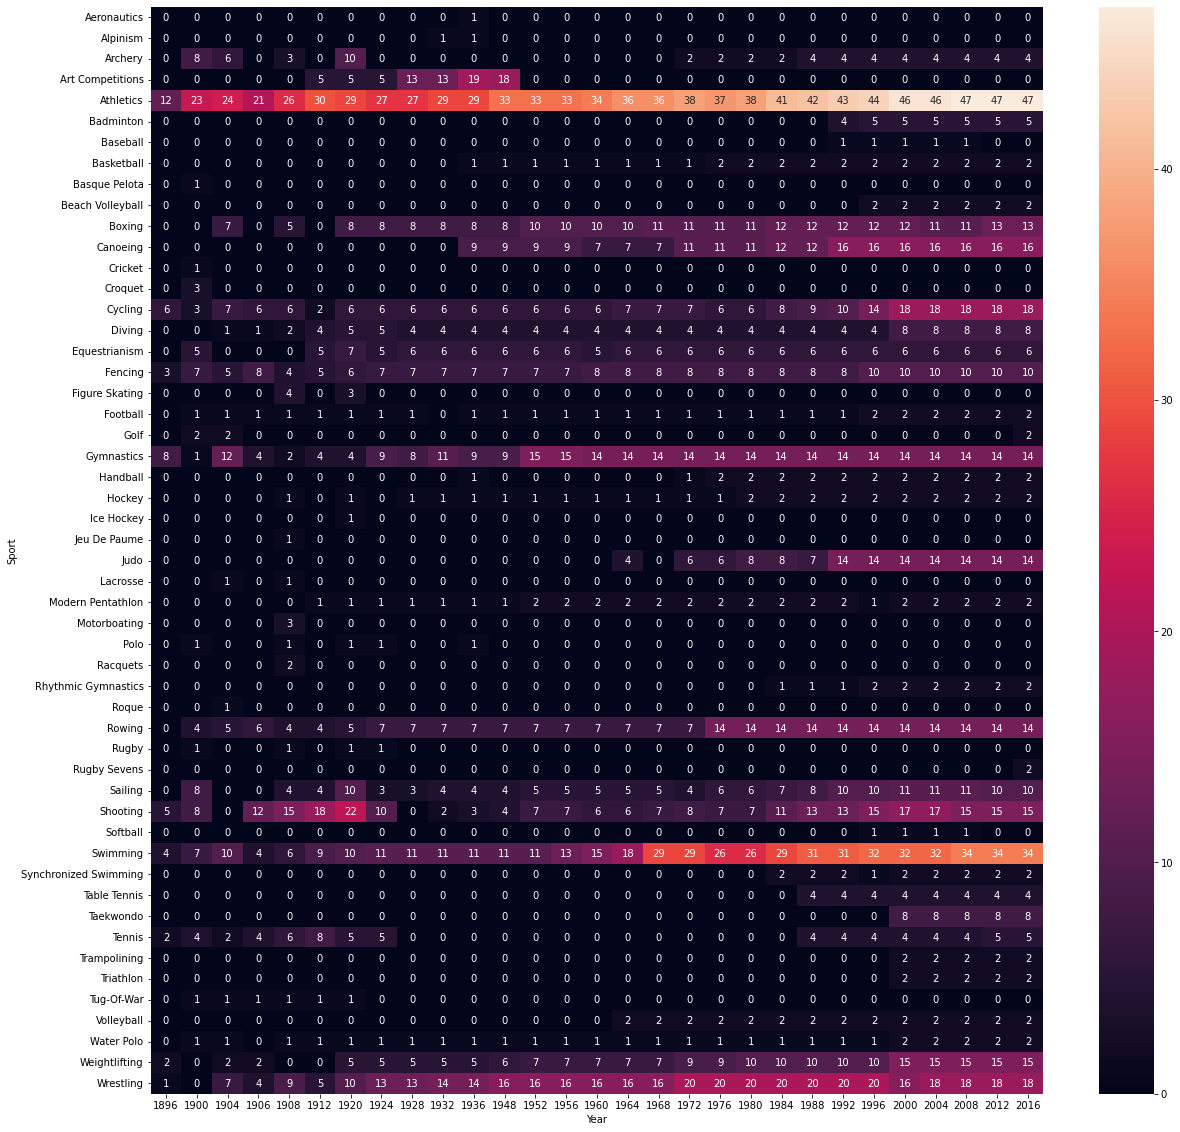

In [127]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [128]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [140]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [141]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


In [142]:
most_successful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


### Country wise
Countrywise medal tally per year (line plot)

What countries are good at heapmap

Most successful Athletes(Top 10)

In [152]:
temp_df = df.dropna(subset=['Medal'])

In [153]:
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\Arjun\AppData\Local\Temp\ipykernel_21472\3437740481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [160]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

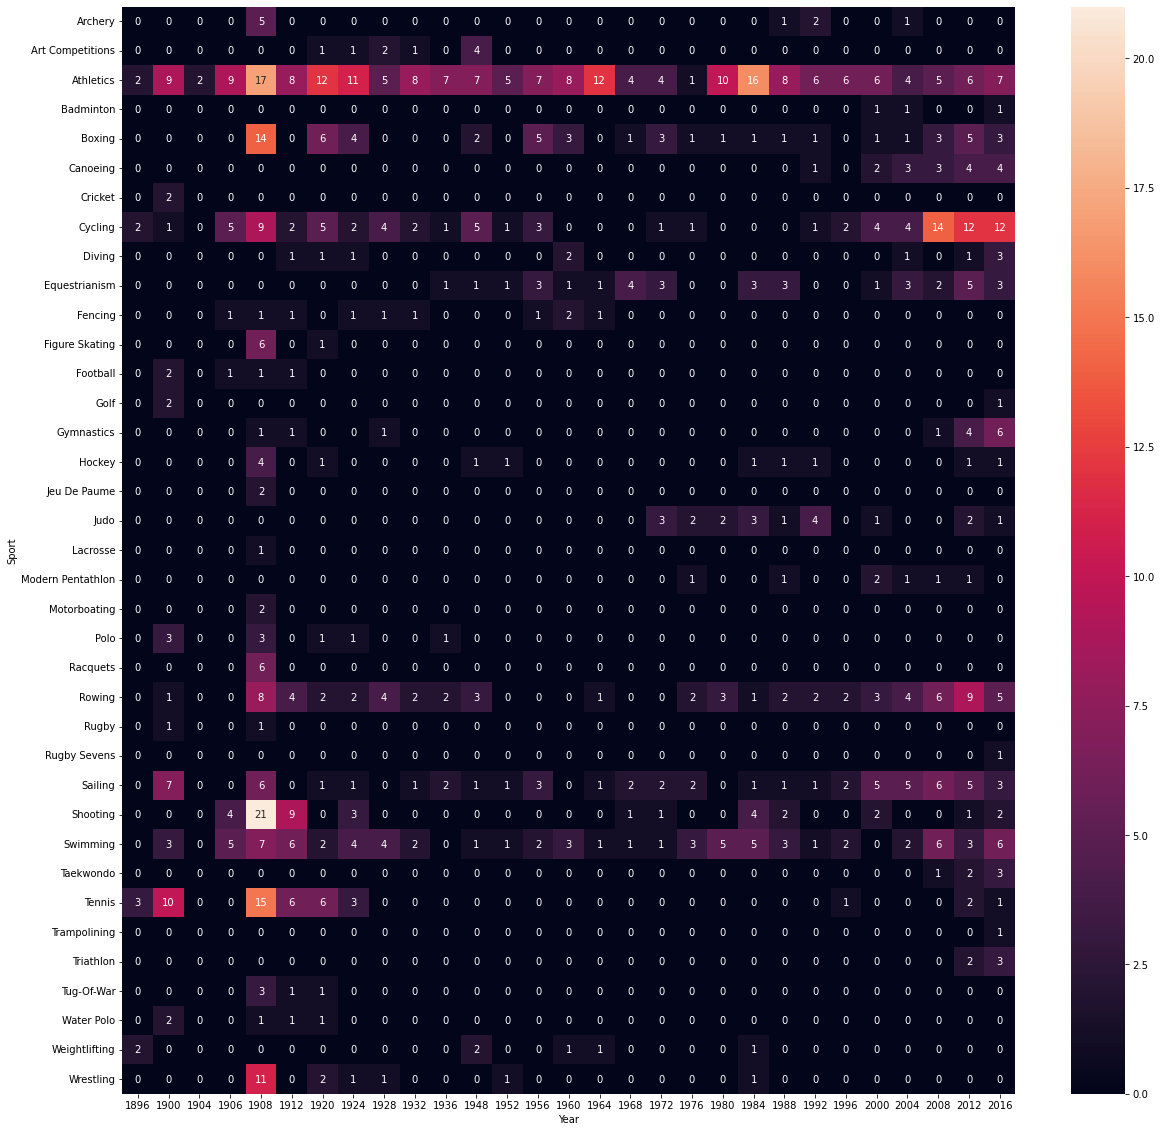

In [173]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [175]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]
    
    x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [179]:
most_successful(df, 'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics


In [184]:
import plotly.figure_factory as ff

In [181]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [188]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [189]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False, show_rug=False)
fig.show()

In [192]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

D:\Anaconda_editor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

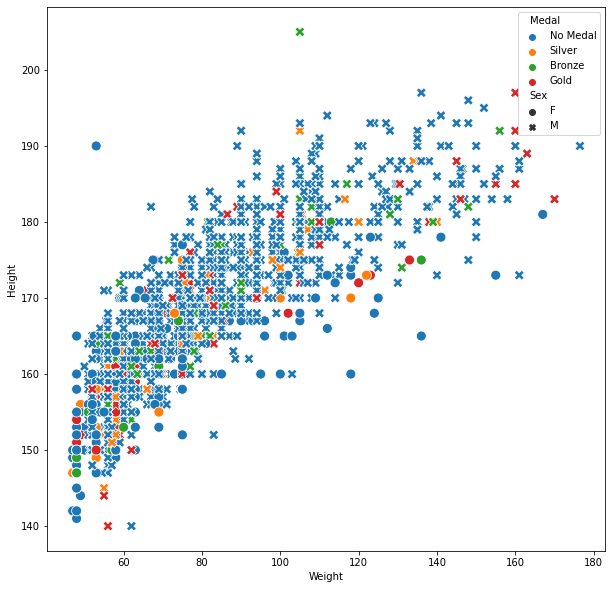

In [209]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Weightlifting']
sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

In [210]:
# Men vs Women Participation

men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()


In [211]:
final = men.merge(women,on='Year', how='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [213]:
final.fillna(0,inplace=True)

In [214]:
fig = px.line(final, x="Year", y=["Male","Female"])
fig.show()